In [1]:
import scipy

from numpy import *
from matplotlib.pyplot import *

def euler_method(dt, x, u):
    #Euler method
    x += u * dt
    return x

class Simulator:
    
    def __init__(self, control, sense, solver = euler_method):
        self.control = control
        self.sense = sense
        self.solver = solver
    
    def run(self, start_time = 0, end_time = 1, start_position=array([0., 0.]), dt = 1e-3):
        time = linspace(start_time, end_time, int(end_time / dt) + 1)

        x = copy(start_position)
        x_t = [copy(x)]

        for t in time:
            y = self.sense(x)
            u = self.control(t, y)
            x = self.solver(dt, x, u)
            x_t.append(copy(x))

        return array(x_t)
    
    def run_and_plot_2d(self, start_time = 0, end_time = 1, start_position=array([0., 0.]), dt = 1e-3):
        x_t = self.run(start_time, end_time, start_position, dt)
        grid()
        plot(x_t[:,0], x_t[:,1])
        if len(x_t) > 1:
            arrow(x_t[0, 0], x_t[0, 1], x_t[1, 0] - x_t[0, 0], x_t[1, 1] - x_t[0, 1], shape='full', lw=10, length_includes_head=True, head_width=.05, color='r')


In [44]:
def multistep_euler_method(dt, x, theta, v, w):
    #Euler method
    theta += w * dt
    u = array([v * sin(theta), v * cos(theta)])
    x += u * dt 
    return (x, theta)

def angle_position_sense(x, theta):
    return (x, theta)

class CarSimulator:
    
    def __init__(self, control, sense = angle_position_sense, solver = multistep_euler_method):
        self.control = control
        self.sense = sense
        self.solver = solver
    
    def run(self, start_time = 0, end_time = 1, start_position=array([0., 0.]), start_angle=0., dt = 1e-3):
        time = linspace(start_time, end_time, int(end_time / dt) + 1)

        x = copy(start_position)
        theta = start_angle
        x_t = [copy(x)]
        theta_t = [copy(theta)]

        for t in time:
            
            y, alpha = self.sense(x, theta)
            v, w = self.control(t, y, alpha)                        
            x, theta = self.solver(dt, x, theta, v, w)
            x_t.append(copy(x))
            theta_t.append(theta)

        return (array(x_t), array(theta_t))
    
    def run_and_plot_2d(self, start_time = 0, end_time = 1, start_position=array([0., 0.]), start_angle=0., dt = 1e-3):
        x_t, theta_t = self.run(start_time, end_time, start_position, start_angle, dt)
        grid()
        plot(x_t[:,0], x_t[:,1])
        if len(x_t) > 1:
            arrow(x_t[0, 0], x_t[0, 1], x_t[1, 0] - x_t[0, 0], x_t[1, 1] - x_t[0, 1], shape='full', lw=10, length_includes_head=True, head_width=.05, color='r')


In [45]:
def controler(t, y):
    return 1

sim = Simulator(sense = lambda x : x, control = controler)

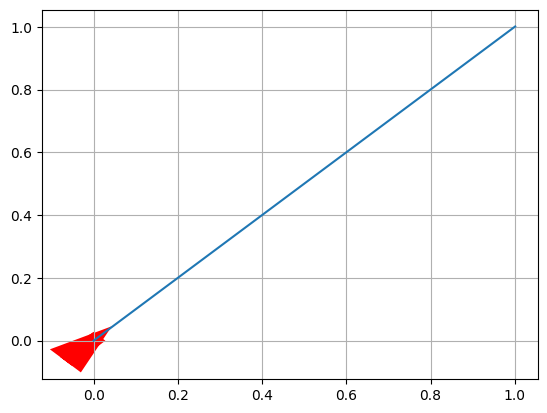

In [46]:
sim.run_and_plot_2d()

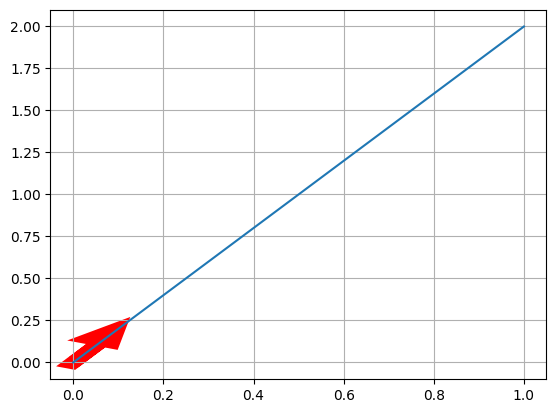

In [47]:
x_d = [1.0, 2.0]
K = 100

def controler(t, y):
    return K * (x_d - y)

sim = Simulator(sense = lambda x : x, control = controler)
sim.run_and_plot_2d()

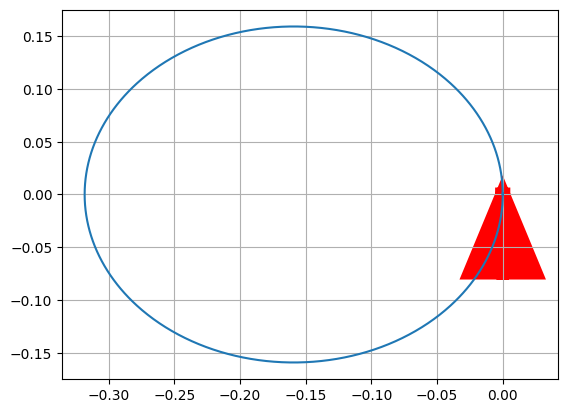

In [48]:
x_d = [1.0, 2.0]
K = 100

PI = pi
TWO_PI = 2 * PI

def curve(t):
    return array([cos(t*TWO_PI)/TWO_PI - 1/TWO_PI, sin(t*TWO_PI)/TWO_PI])

def controler(t, y):
    return array([-sin(t*TWO_PI), cos(t*TWO_PI)]) + K * (curve(t) - y)

sim = Simulator(sense = lambda x : x, control = controler)
sim.run_and_plot_2d()

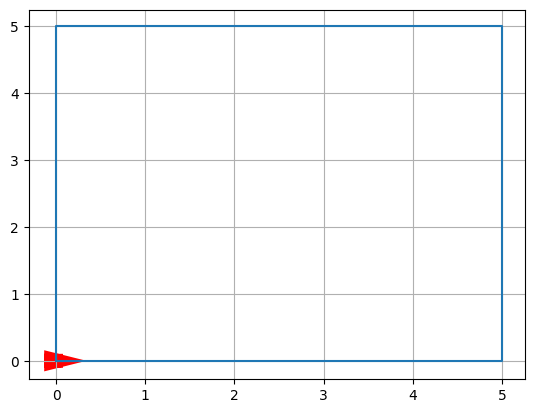

In [49]:
def curve2(t):
    
    # 0 to 0.25
    if t % 1 <= 0.25:
        return array([20. * (t % 1), 0])
    elif t % 1 <= 0.5:
        return array([5., 20. * ((t - 0.25) % 1)])
    elif t % 1 <= 0.75:
        return array([5. - 20. * ((t - 0.5) % 1), 5.])
    else:
        return array([0, 5. - 20. * ((t - 0.75) % 1)])

def d_curve2(t):
    # 0 to 0.25
    if t % 1 < 0.25:
        return array([20., 0])
    elif t % 1 < 0.5:
        return array([0, 20.])
    elif t % 1 < 0.75:
        return array([-20., 0])
    else:
        return array([0, -20.])

#Simulator.grid()

#t = Simulator.linspace(0, 1, 1000)
#c = Simulator.array([curve2(x) for x in t])
#Simulator.plot(c[:,0], c[:,1])
#Simulator.show()

def controler(t, y):
    return d_curve2(t) + K * (curve2(t) - y)

sim = Simulator(sense = lambda x : x, control = controler)
sim.run_and_plot_2d()

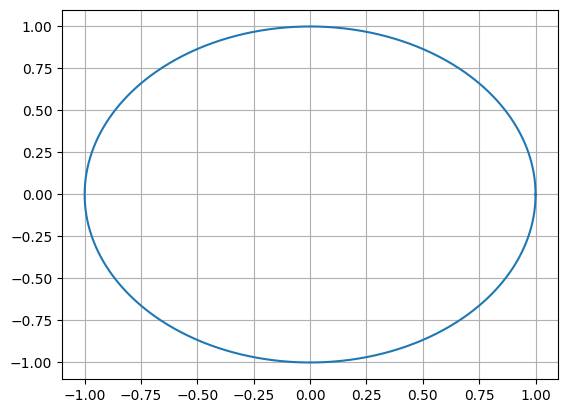

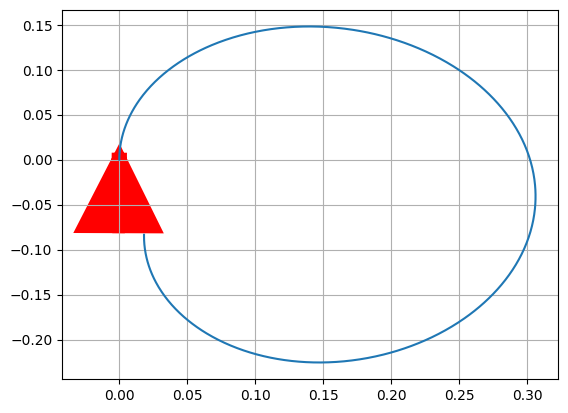

In [67]:
x_d = [1.0, 2.0]
K = 100

PI = pi
TWO_PI = 2 * PI

def curve_pos(t):
    return array([cos(t*TWO_PI), sin(t*TWO_PI)])

def curve_theta(t):
    pos = curve_pos(t)
    if pos[0] == 0.0:
        return pi / 2.
    alpha = arctan(pos[1] / pos[0])
    return pi / 2. - alpha

t = linspace(0, 1, 1000)
c = array([curve_pos(x) for x in t])
grid()
plot(c[:,0], c[:,1])
show()

def controler(t, y, alpha):
    #print(t, y,"vs",curve_pos(t), alpha,"vs",curve_theta(t),linalg.norm(curve_pos(t) - y), (curve_theta(t) - alpha))
    # return v and w
    return (1 * linalg.norm(curve_pos(t) - y), 2 * pi)#1e3*(curve_theta(t) - alpha))
    
    #return array([-sin(t*TWO_PI), cos(t*TWO_PI)]) + K * (curve(t) - y)

sim = CarSimulator(control = controler)
sim.run_and_plot_2d(start_angle=0, dt=1e-3)

In [ ]:

def curve3(t):
    
    # 0 to 0.25
    if t % 1 <= 0.25:
        return array([20. * (t % 1), 0])
    elif t % 1 <= 0.5:
        #cubic spline
        #return Simulator.array([5., 20. * ((t - 0.25) % 1)])
    elif t % 1 <= 0.75:
        return array([5. - 20. * ((t - 0.5) % 1), 5.])
    else:
        #cubic sipline
        #return Simulator.array([0, 5. - 20. * ((t - 0.75) % 1)])


Simulator.grid()

t = Simulator.linspace(0, 1, 1000)
c = Simulator.array([curve3(x) for x in t])
Simulator.plot(c[:,0], c[:,1])
Simulator.show()


        
def d_curve2(t):
    # 0 to 0.25
    if t % 1 < 0.25:
        return Simulator.array([20., 0])
    elif t % 1 < 0.5:
        return Simulator.array([0, 20.])
    elif t % 1 < 0.75:
        return Simulator.array([-20., 0])
    else:
        return Simulator.array([0, -20.])

def controler(t, y):
    return d_curve2(t) + K * (curve2(t) - y)

sim = Simulator.Simulator(sense = lambda x : x, control = controler)
sim.run_and_plot_2d()